# Sentiment Analysis of Spotify App Review using VADER

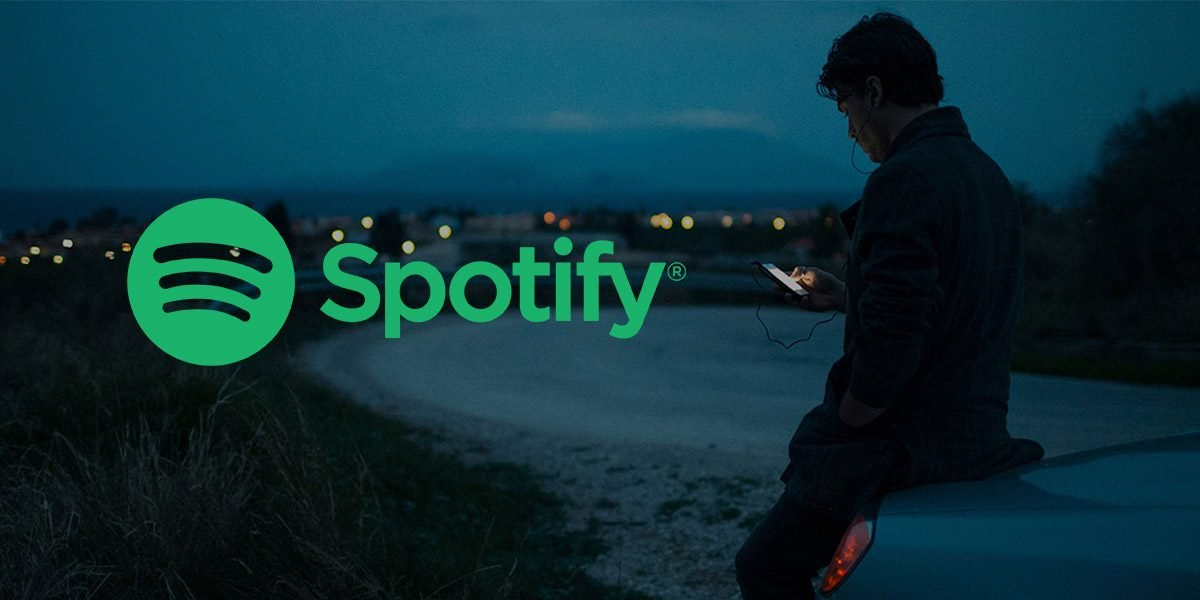

***

## Few installations

In [1]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.6 MB/s eta 0:00:00


In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [3]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.5 MB/s eta 0:00:00


## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import nltk
import re
import contractions
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Reading the dataset

In [8]:
data=pd.read_csv('/content/drive/MyDrive/Sentiment analysis/reviews.csv')
data.head(3)

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN


In [9]:
data=data[['Review','Rating']]
data

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1
...,...,...
61589,Even though it was communicated that lyrics fe...,1
61590,"Use to be sooo good back when I had it, and wh...",1
61591,This app would be good if not for it taking ov...,2
61592,The app is good hard to navigate and won't jus...,2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  61594 non-null  object
 1   Rating  61594 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 962.5+ KB


In [11]:
data.nunique()

Review    61356
Rating        5
dtype: int64

In [12]:
sorted(data.Rating.unique())

[1, 2, 3, 4, 5]

## Data Preprocessing

In [13]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [14]:
data.duplicated().sum()

201

In [15]:
data=data.drop_duplicates()
data

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1
...,...,...
61589,Even though it was communicated that lyrics fe...,1
61590,"Use to be sooo good back when I had it, and wh...",1
61591,This app would be good if not for it taking ov...,2
61592,The app is good hard to navigate and won't jus...,2


In [16]:
def text_preprocessing(text):
  text=text.lower()
  text=contractions.fix(text)
  text=re.sub('[^a-zA-Z\s]','',text)
  text=" ".join([wrd for wrd in text.split() if wrd not in stopwords])
  text=" ".join([lemma.lemmatize(wrd) for wrd in text.split()])
  return text

In [17]:
data.Review=[text_preprocessing(sen) for sen in data.Review]

In [18]:
data

,Review,Rating
0,great music service audio high quality app eas...,5
1,please ignore previous negative rating app sup...,5
2,popup get best spotify experience android anno...,4
3,really buggy terrible use recently,1
4,dear spotify get song put playlist shuffle play,1
...,...,...
61589,even though communicated lyric feature availab...,1
61590,use sooo good back downloaded free version cou...,1
61591,app would good taking device start comp spotif...,2
61592,app good hard navigate let play song click pla...,2


In [19]:
pos=[nltk.pos_tag([wrd for wrd in sen.split()]) for sen in data.Review]
pos

[[('great', 'JJ'),
  ('music', 'NN'),
  ('service', 'NN'),
  ('audio', 'RB'),
  ('high', 'JJ'),
  ('quality', 'NN'),
  ('app', 'VBP'),
  ('easy', 'JJ'),
  ('use', 'NN'),
  ('also', 'RB'),
  ('quick', 'RB'),
  ('friendly', 'JJ'),
  ('support', 'NN')],
 [('please', 'VB'),
  ('ignore', 'RB'),
  ('previous', 'JJ'),
  ('negative', 'JJ'),
  ('rating', 'NN'),
  ('app', 'JJ'),
  ('super', 'JJ'),
  ('great', 'JJ'),
  ('give', 'JJ'),
  ('five', 'CD'),
  ('star', 'NN')],
 [('popup', 'NN'),
  ('get', 'VB'),
  ('best', 'JJS'),
  ('spotify', 'NN'),
  ('experience', 'NN'),
  ('android', 'NN'),
  ('annoying', 'VBG'),
  ('please', 'JJ'),
  ('let', 'VB'),
  ('u', 'JJ'),
  ('get', 'VB'),
  ('rid', 'JJ')],
 [('really', 'RB'),
  ('buggy', 'JJ'),
  ('terrible', 'JJ'),
  ('use', 'NN'),
  ('recently', 'RB')],
 [('dear', 'JJ'),
  ('spotify', 'NN'),
  ('get', 'NN'),
  ('song', 'NN'),
  ('put', 'VBD'),
  ('playlist', 'NN'),
  ('shuffle', 'NN'),
  ('play', 'NN')],
 [('player', 'NN'),
  ('control', 'NN'),
  ('some

## Data Visualization

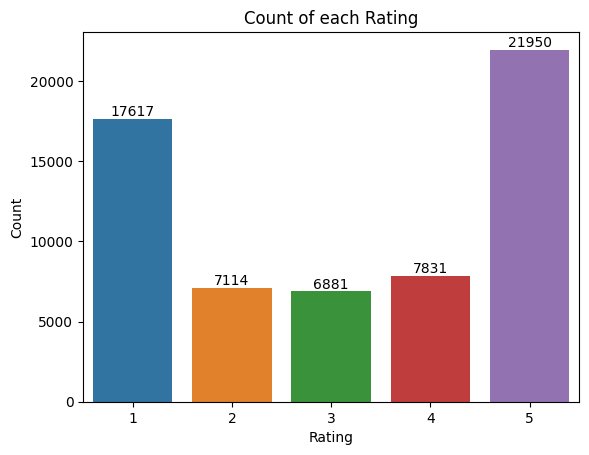

In [20]:
rate=data.Rating.value_counts()
ax=sns.barplot(x=rate.index,y=rate.values)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of each Rating')
plt.show()

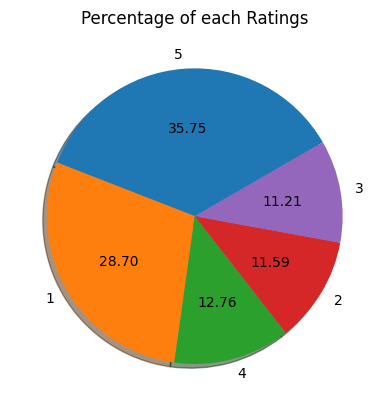

In [21]:
plt.pie(x=data.Rating.value_counts(),autopct="%.2f",labels=data.Rating.value_counts().index,startangle=30,
       shadow=True)
plt.title('Percentage of each Ratings')
plt.show()

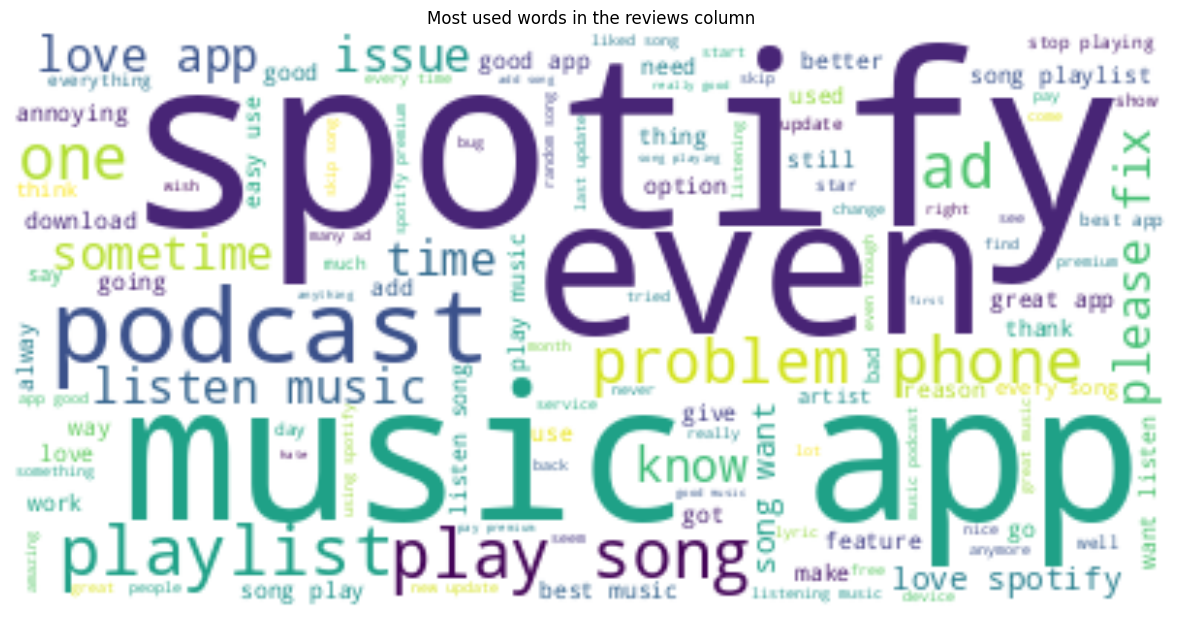

In [22]:
text=" ".join([sen for sen in data.Review])
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most used words in the reviews column')
plt.axis('off')
plt.show()

## Sentiment Analysis

In [23]:
sentiments = SentimentIntensityAnalyzer()

In [24]:
data.Review[1]

'please ignore previous negative rating app super great give five star'

In [25]:
sentiments.polarity_scores(data.Review[1])

{'neg': 0.276, 'neu': 0.267, 'pos': 0.458, 'compound': 0.6249}

In [26]:
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in data["Review"]]

In [27]:
data

,Review,Rating,Positive,Negative,Neutral,Compound
0,great music service audio high quality app eas...,5,0.589,0.000,0.411,0.9169
1,please ignore previous negative rating app sup...,5,0.458,0.276,0.267,0.6249
2,popup get best spotify experience android anno...,4,0.378,0.157,0.465,0.5859
3,really buggy terrible use recently,1,0.000,0.458,0.542,-0.5233
4,dear spotify get song put playlist shuffle play,1,0.455,0.000,0.545,0.6124
...,...,...,...,...,...,...
61589,even though communicated lyric feature availab...,1,0.084,0.110,0.806,-0.1779
61590,use sooo good back downloaded free version cou...,1,0.379,0.151,0.470,0.8810
61591,app would good taking device start comp spotif...,2,0.157,0.293,0.551,-0.7854
61592,app good hard navigate let play song click pla...,2,0.331,0.046,0.623,0.8271


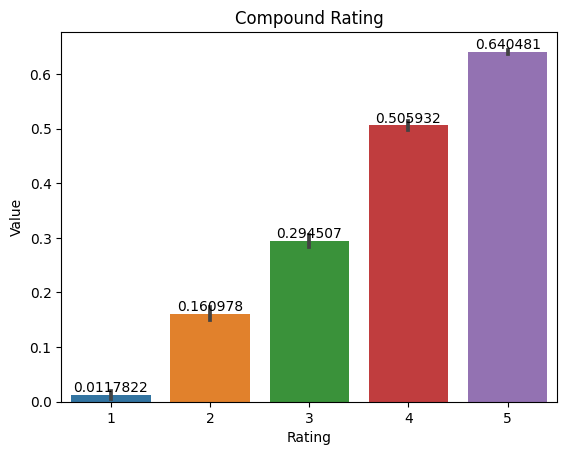

In [28]:
ax=sns.barplot(x=data.Rating, y=data.Compound)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Compound Rating')
plt.ylabel('Value')
plt.show()

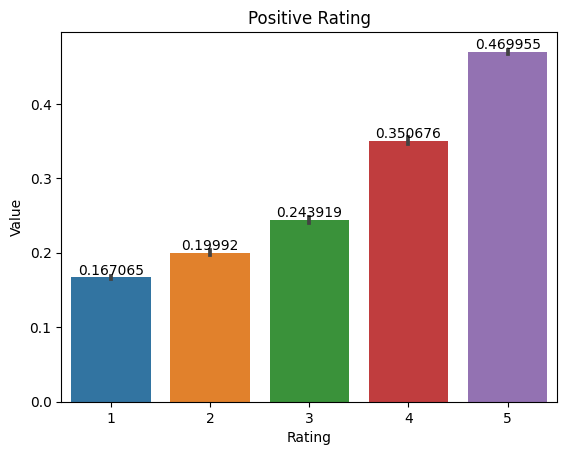

In [29]:
ax=sns.barplot(x=data.Rating, y=data.Positive)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Positive Rating')
plt.ylabel('Value')
plt.show()

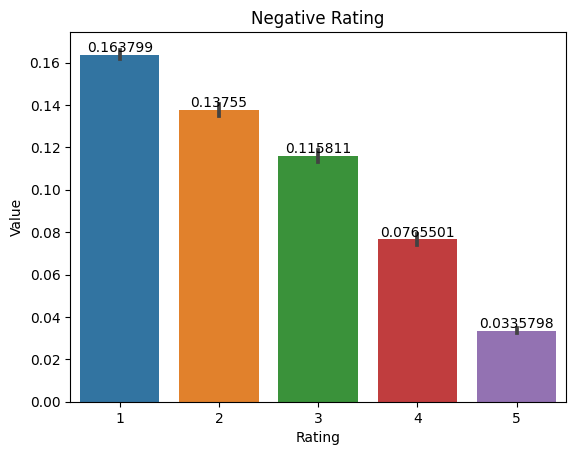

In [30]:
ax=sns.barplot(x=data.Rating, y=data.Negative)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Negative Rating')
plt.ylabel('Value')
plt.show()

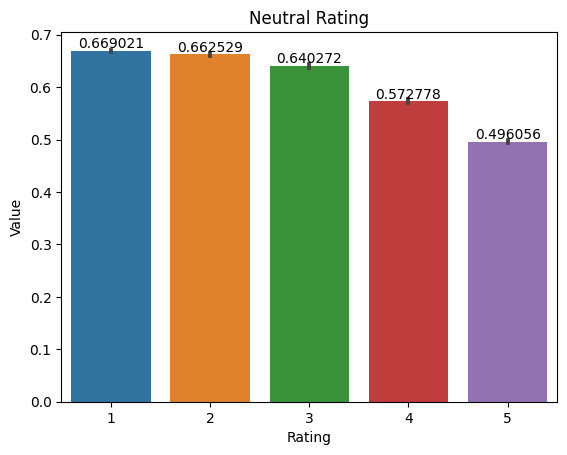

In [31]:
ax=sns.barplot(x=data.Rating, y=data.Neutral)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Neutral Rating')
plt.ylabel('Value')
plt.show()

In [32]:
def senti_score(a,b,c):
    if max([a,b,c])==a:
        return ("Positive")
    elif max([a,b,c])==b:
        return "Negative"
    else:
        return "Neutral"

In [33]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])
print("Positive Sentiment score: ", x)
print("Negative Sentiment score: ", y)
print("Neutral Sentiment score: ", z)
print("Overall Sentiment score : ", senti_score(x,y,z))

Positive Sentiment score:  19105.47099999964
Negative Sentiment score:  5997.604999999994
Neutral Sentiment score:  36278.940000000766
Overall Sentiment score :  Neutral


_So, most people gave Neutral reviews, and a small proportion of people give Negative reviews. So we can say that people are satisfied with the Spotify App._

## Predictions

- ### using VADER

In [34]:
def senti_pred(sen):
    d=sentiments.polarity_scores(sen)
    del d['compound']
    if max(d, key=lambda key: d[key])=='pos':
        return 'POSITIVE'
    elif max(d, key=lambda key: d[key])=='neg':
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

In [35]:
senti_pred('I love sentiment analysis!')

'POSITIVE'

- ### The Transformers Pipeline

In [36]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [37]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]